In [1]:
import numpy as np
from PIL import Image
import glob

#### 전체 사진중 최대 해상도 찾기

In [2]:
dirNames = ['Aiden', 'Andrew','Cathy']

In [3]:
widthRatio = []
heightRatio = []

for name in dirNames:
    for file in sorted(glob.glob("../Data/Face/%s/*.jpg"%name)):
        img = np.array(Image.open(file), dtype=np.int32)
        widthRatio.append(img.shape[1])
        heightRatio.append(img.shape[0])

In [4]:
print("너비 최대 해상도 :", np.max(widthRatio))
print("높이 최대 해상도 :", np.max(heightRatio))

너비 최대 해상도 : 299
높이 최대 해상도 : 381


> 해상도의 크기를 400 * 300

##### 전체 사진을 400 * 300의 고정 크기로 검은색을 배경으로 맞추기

In [8]:
for name in dirNames:
    fileCount = 0
    for file in sorted(glob.glob("../Data/Face/%s/*.jpg"%name)):
        img = Image.open(file)
        img = img.convert('L')
        imgArray = np.array(img)

        imgDummy = np.zeros(400*300).reshape(400, 300)
        rowNum = (400 - imgArray.shape[0]) / 2
        colNum = (300 - imgArray.shape[1]) / 2

        k = 0
        for i in range(int(rowNum), int(rowNum)+imgArray.shape[0]):
            l = 0
            for j in range(int(colNum), int(colNum)+imgArray.shape[1]):
                imgDummy[i,j] = imgArray[k,l]
                l+=1
            k+=1
        
        img2 = Image.fromarray(imgDummy.astype('uint8'))
        img2.save("../Data/FaceGray/%s/image_%04d.jpg"%(name, fileCount), "JPEG")
        fileCount += 1

#### 사진들을 numpy배열로 Train Data 만들기

In [9]:
number_of_data = 18 * len(dirNames)
img_width_size = 300
img_height_size = 400

In [10]:
train = np.zeros(
            number_of_data*img_width_size*img_height_size, dtype=np.int32
        ).reshape(number_of_data, img_height_size, img_width_size) 

i = 0

for name in dirNames:
    for file in sorted(glob.glob("../Data/FaceGray/%s/*.jpg"%name)):
        img = np.array(Image.open(file), dtype=np.int32)
        train[i,:,:] = img
        i+=1


In [11]:
train.shape

(54, 400, 300)

#### 이미지 확인

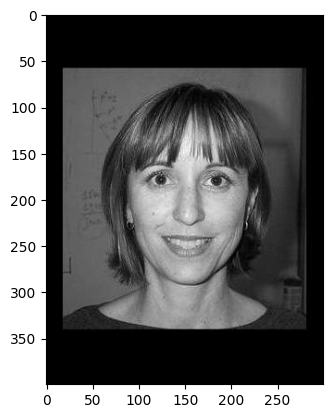

In [12]:
import matplotlib.pyplot as plt

plt.imshow(train[40].reshape(400, 300), cmap='gray')
plt.show()

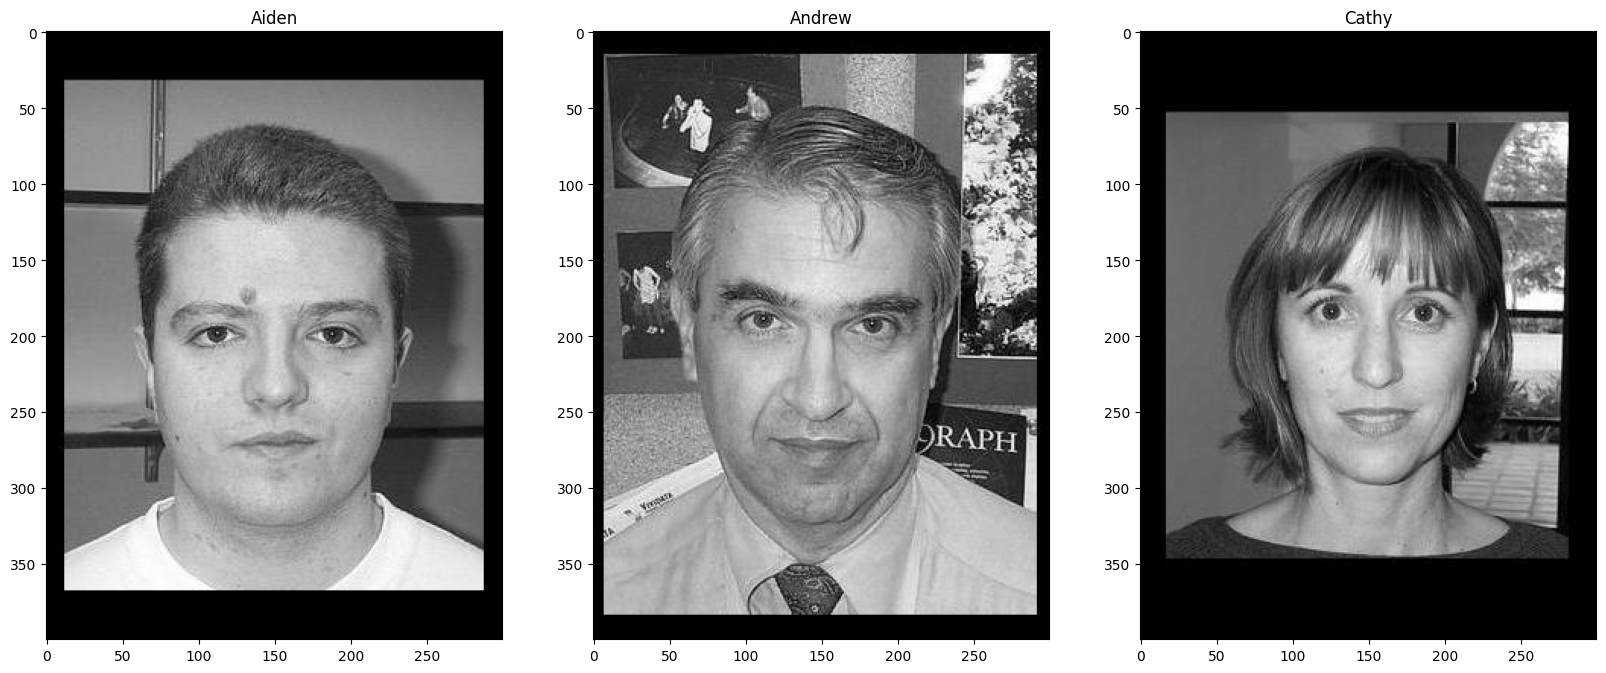

In [15]:
plt.figure(figsize=(20, 20))
orderNo = list(range(0, len(dirNames)*18, 18))

for i in range(1, len(dirNames)+1):
    plt.subplot(1, len(dirNames), i)
    plt.imshow(train[orderNo[i-1]].reshape(400, 300), cmap='gray')
    plt.title(dirNames[i-1])

#### target data 만들기

In [16]:
target = np.concatenate(
            [np.zeros(18), np.ones(18), np.full(18, 2)]
)
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.])